# 1.初始準備

In [1]:
%env KERAS_BACKEND=tensorflow

import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


# 2.引入資料

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2.1input前處理

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train[9487].shape

(28, 28, 1)

In [6]:
X = x_train[9487][:,:,0]

## 2.2output前處理

In [7]:
from keras.utils import np_utils

In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 3.建立神經網路

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [10]:
model = Sequential()

## 3.1第一層

In [11]:
model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

## 3.2第二層

In [13]:
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

## 3.3第三層

In [15]:
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

## 3.4output層

In [17]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [18]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 3.5組裝

In [19]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

## 3.6訓練

In [21]:
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 54s 897us/step - loss: 0.1790 - accuracy: 0.1046
Epoch 2/5
60000/60000 [==============================] - 52s 874us/step - loss: 0.1791 - accuracy: 0.1044s -
Epoch 3/5
60000/60000 [==============================] - 52s 868us/step - loss: 0.1790 - accuracy: 0.1045
Epoch 4/5
60000/60000 [==============================] - 52s 866us/step - loss: 0.1728 - accuracy: 0.1266
Epoch 5/5
60000/60000 [==============================] - 55s 915us/step - loss: 0.0250 - accuracy: 0.8306s - los


# 5.測試並儲存

In [22]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 215us/step


In [23]:
print('loss:', score[0])
print('acc:', score[1])

loss: 0.005263642879765484
acc: 0.9661999940872192


In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
predict = model.predict_classes(x_test)

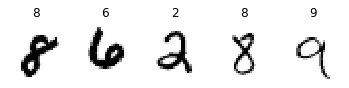

In [26]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")

In [27]:
model_json = model.to_json()
open("handwriting_model_cnn.json", 'w').write(model_json)
model.save_weights('handwriting_model_weights_cnn.h5')